In [58]:
import requests 
import json 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import time
import gzip
import shutil

In [19]:
def get_bybit_bars(symbol, interval, startTime, endTime):
 
    url = "https://api.bybit.com/v2/public/kline/list"
 
    startTime = str(int(startTime.timestamp()))
    endTime   = str(int(endTime.timestamp()))
 
    req_params = {"symbol" : symbol, 'interval' : interval, 'from' : startTime, 'to' : endTime}
 
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text)['result'])
 
    if (len(df.index) == 0):
        return None
     
    df.index = [dt.datetime.fromtimestamp(x) for x in df.open_time]
 
    return df

In [20]:
get_bybit_bars('ETHUSD', 1,
               dt.datetime(2020, 1, 1),
               dt.datetime(2020, 2, 1))

,symbol,interval,open_time,open,high,low,close,volume,turnover
2020-01-01 00:00:00,ETHUSD,1,1577833200,128.4,128.6,128.4,128.6,121598,945.87941068
2020-01-01 00:01:00,ETHUSD,1,1577833260,128.6,128.65,128.6,128.6,43473,338.04790321
2020-01-01 00:02:00,ETHUSD,1,1577833320,128.6,128.6,128.5,128.5,200,1.55642023
2020-01-01 00:03:00,ETHUSD,1,1577833380,128.5,128.5,128.35,128.35,51295,399.49366941000005
2020-01-01 00:04:00,ETHUSD,1,1577833440,128.35,128.5,128.35,128.5,9182,71.45663521
...,...,...,...,...,...,...,...,...,...
2020-01-01 03:15:00,ETHUSD,1,1577844900,130,130,129.95,129.95,200,1.53905345
2020-01-01 03:16:00,ETHUSD,1,1577844960,129.95,130,129.95,130,1097,8.43846153
2020-01-01 03:17:00,ETHUSD,1,1577845020,130,130,129.95,130,861,6.623085769999999
2020-01-01 03:18:00,ETHUSD,1,1577845080,130,130.2,130,130.15,38815,298.42801629999997


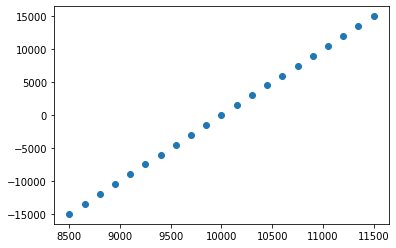

In [42]:
perChange_arr = np.linspace(0.85,1.15,21)
results = []


for perChange in perChange_arr:
    Px0 = 10_000
    Px1 = Px0*perChange
    x = 100_000 * 1 * (1/Px0 - 1/Px1) 

    PnL = x*Px1
    results.append(PnL)
    
plt.scatter(perChange_arr*Px0, results)

In [46]:
60_000 * 1 * (1/600 - 1/700)*700

10000.000000000004

In [44]:
20*500

10000

In [73]:
path = 'BTCUSD2019-10-09_premium_index.csv.gz'
path = 'BTCUSD2019-10-03_index_price.csv.gz'
path = 'BTCUSDU212021-07-26_v2.csv.gz'
path = 'BTCUSDU222022-03-11.csv.gz'

with gzip.open(path, 'rb') as f_in:
    with open('file.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [74]:
df = pd.read_csv('file.txt')

pd.to_datetime(df.timestamp*1000_000_000)

0       2022-03-11 08:00:01
1       2022-03-11 08:00:03
2       2022-03-11 08:00:18
3       2022-03-11 08:00:19
4       2022-03-11 08:00:20
                ...        
11974   2022-03-11 23:59:33
11975   2022-03-11 23:59:43
11976   2022-03-11 23:59:45
11977   2022-03-11 23:59:48
11978   2022-03-11 23:59:48
Name: timestamp, Length: 11979, dtype: datetime64[ns]

In [75]:
df

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
0,1646985601,BTCUSDU22,Sell,1700,39978.0,PlusTick,b00abe37-997b-531f-a3f2-f7b4b55e6315,4.252339e+06,1700,0.042523
1,1646985603,BTCUSDU22,Sell,321,39996.0,PlusTick,7a0eed98-ec35-5d1c-a75f-7b0b8c45b7bc,8.025803e+05,321,0.008026
2,1646985618,BTCUSDU22,Sell,21,40000.0,PlusTick,a647c232-22c4-55eb-9b36-cb7da563ddfa,5.250000e+04,21,0.000525
3,1646985619,BTCUSDU22,Buy,21,40008.0,PlusTick,926d3ce5-3927-50cc-888b-dd4c18006305,5.248950e+04,21,0.000525
4,1646985620,BTCUSDU22,Sell,7,40007.5,MinusTick,215fe8cf-5d9b-5bcb-9df9-78220fe20a83,1.749672e+04,7,0.000175
...,...,...,...,...,...,...,...,...,...,...
11974,1647043173,BTCUSDU22,Sell,2700,39539.0,ZeroMinusTick,a65d7747-e49c-5f24-be32-468e5bbeb3ad,6.828701e+06,2700,0.068287
11975,1647043183,BTCUSDU22,Sell,16,39537.0,MinusTick,185c1811-a1e9-5de8-b7eb-f5706782e08a,4.046842e+04,16,0.000405
11976,1647043185,BTCUSDU22,Buy,40,39537.5,PlusTick,243b9a2d-79fe-5965-bcc9-e17ad1d94a49,1.011698e+05,40,0.001012
11977,1647043188,BTCUSDU22,Sell,6,39537.0,MinusTick,4d349e43-6829-558b-b992-e160858079d7,1.517566e+04,6,0.000152
